<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

---

### Let us begin...

Recall the `data science process`.
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

#### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. 

#### When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data.

In [172]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, \
BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error ,root_mean_squared_error,accuracy_score , \
precision_score, recall_score,  f1_score
from sklearn.model_selection import train_test_split, cross_val_score \
,GridSearchCV  #
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('401ksubs.csv')

In [5]:
data.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [7]:
# Occupation
# Education
# Early Retire


##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [9]:
# As “unfair treatment” of human beings based on race, ethnicity, colour, and so on, 
# it should be evident that racism is primarily a subject of ethics


#https://pmc.ncbi.nlm.nih.gov/articles/PMC7778398/

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [11]:
data.shape

(9275, 11)

In [12]:
data.dtypes

e401k       int64
inc       float64
marr        int64
male        int64
age         int64
fsize       int64
nettfa    float64
p401k       int64
pira        int64
incsq     float64
agesq       int64
dtype: object

In [13]:
data.isnull().sum()

e401k     0
inc       0
marr      0
male      0
age       0
fsize     0
nettfa    0
p401k     0
pira      0
incsq     0
agesq     0
dtype: int64

In [14]:
data.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192483,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469424,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155600,1089.000000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025500,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.000000


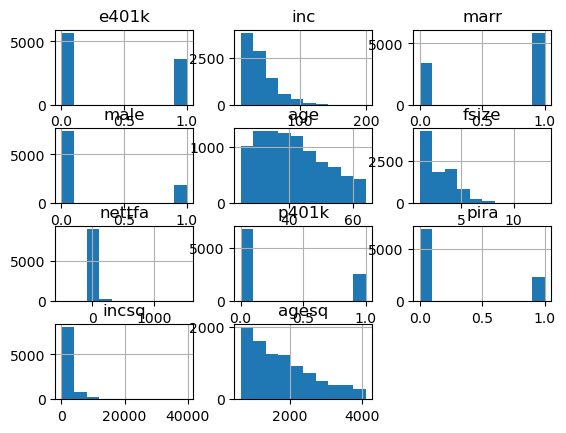

In [15]:
data.hist();

In [16]:
data.corr()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
e401k,1.000000,0.268178,0.080843,-0.027641,0.031526,0.012015,0.143950,0.769170,0.118643,0.206618,0.017526
inc,0.268178,1.000000,0.362008,-0.069871,0.105638,0.110170,0.376586,0.270833,0.364354,0.940161,0.087305
marr,0.080843,0.362008,1.000000,-0.363950,0.059047,0.564814,0.075039,0.085636,0.116925,0.280060,0.054500
male,-0.027641,-0.069871,-0.363950,1.000000,-0.120297,-0.320678,-0.018132,-0.024949,-0.036361,-0.053715,-0.116235
age,0.031526,0.105638,0.059047,-0.120297,1.000000,-0.030536,0.203906,0.025977,0.238557,0.097584,0.992619
fsize,0.012015,0.110170,0.564814,-0.320678,-0.030536,1.000000,-0.031506,0.014296,-0.043629,0.079570,-0.055924
nettfa,0.143950,0.376586,0.075039,-0.018132,0.203906,-0.031506,1.000000,0.187392,0.345917,0.407568,0.203703
p401k,0.769170,0.270833,0.085636,-0.024949,0.025977,0.014296,0.187392,1.000000,0.153033,0.222113,0.015740
pira,0.118643,0.364354,0.116925,-0.036361,0.238557,-0.043629,0.345917,0.153033,1.000000,0.322805,0.233543
incsq,0.206618,0.940161,0.280060,-0.053715,0.097584,0.079570,0.407568,0.222113,0.322805,1.000000,0.082991


In [17]:
data.skew()

e401k      0.441960
inc        1.603880
marr      -0.532267
male       1.466124
age        0.403794
fsize      0.791573
nettfa    10.165426
p401k      1.001095
pira       1.128386
incsq      4.019208
agesq      0.778686
dtype: float64

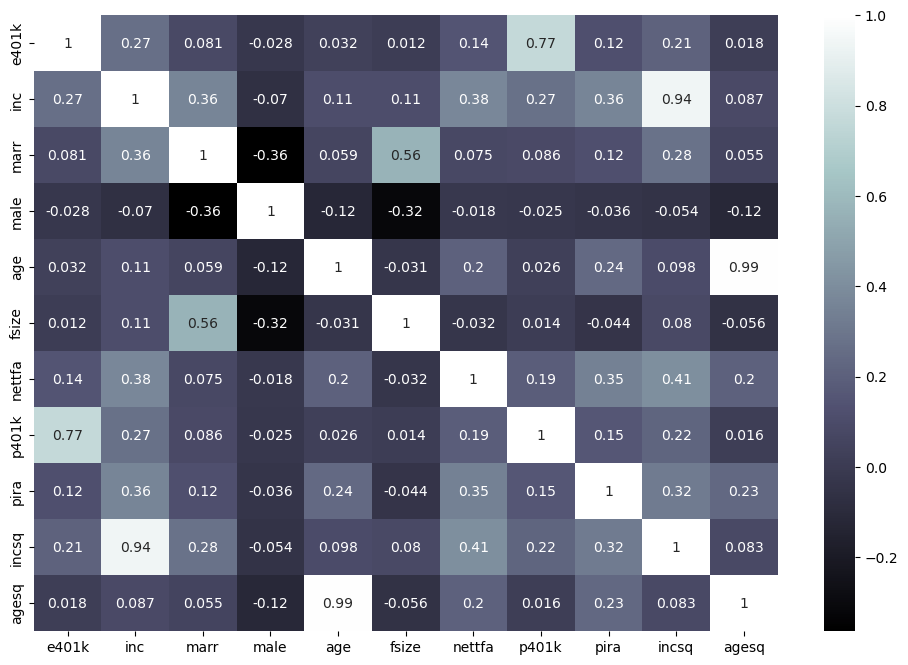

In [190]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='bone');

In [19]:
features = data[['e401k','marr', 'male', 'age', 'fsize', 'nettfa',	'p401k', 'pira','incsq' ,'agesq']]
target = data['inc']

In [128]:
X = data[['e401k','marr', 'male', 'age', 'fsize','nettfa', 'pira','agesq']]
y = data['inc']

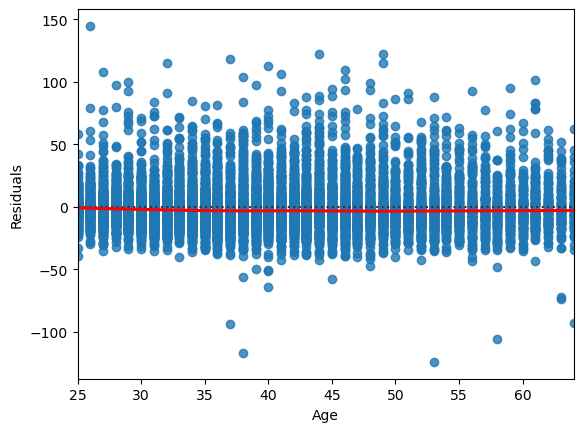

In [130]:
import statsmodels.api as sm
X_ols = features[['age']]
X_ols = sm.add_constant(X) 
model = sm.OLS(target, X_ols).fit()
predictions = model.predict(X_ols)

residuals = target - predictions

sns.residplot(x=features['age'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Income(inc, incsq) because the model will predict the income. If we use these two columns it will 100% correct

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs (Subject Matter Experts) might have done this!

In [ ]:
# incsq and agesq this is prepare for 
# Testing whether or not there is a relationship between two categorical variables
# Is there a relationship between incsq and agesq affiliation?

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [ ]:
# inc and age are incorrect description both shows inc^2 , age^2. 
# The information should display as below:
# inc description income 1000$
# age description ages 

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [ ]:
# Regression Method:
# Linear regression, Logistic regression, OLS , Ridge, Lasso, Polynomial regression, KNN, Gridsearch, Pipline, 
# regularization, bootstrapping, bagging, Decision tree, Random forest Robust regression, Adaboost model.

# Our target variable, is continuous and the our result will be numerical value.
#- a multiple linear regression model : Simple and Easy to interpret and widely use for model
#- a k-nearest neighbors model : Simple and Easy to interpret and adapt for non-linear relationship
#- a decision tree : decision trees are interpretable and effective for a range of tasks, 
                    # they can overfit on data and tend to be sensitive to data variations
#- a set of bagged decision trees : :Reduces Overfitting ,improved prediction accuracy
#- a random forest:Reduces Overfitting ,improved prediction accuracy
#- an Adaboost model : Adaboost increases their importance for the next model, helping the ensemble focus on hard-to-classify cases

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Bagging': BaggingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

In [69]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds_train = model.predict(X_train)
        preds = model.predict(X_test)
        score_train = model.score(X_train, y_train)
        score = model.score(X_test, y_test)
        mse_train  = mean_squared_error(y_train, preds_train)
        mse = mean_squared_error(y_test, preds)
        rmse_train = root_mean_squared_error(y_train, preds_train)
        rmse = root_mean_squared_error(y_test, preds)
        print(f'train_data {name} - R^2: {score_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:4f}')
        print(f'test_data {name} - R^2: {score:.4f}, MSE: {mse:.4f}, RMSE: {rmse:4f}\n')


In [114]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
evaluate_models(X_train_sc, X_test_sc, y_train, y_test, models)

train_data Linear Regression - R^2: 0.3637, MSE: 365.8314, RMSE: 19.126719
test_data Linear Regression - R^2: 0.3367, MSE: 395.4699, RMSE: 19.886425

train_data KNN - R^2: 0.5364, MSE: 266.5168, RMSE: 16.325343
test_data KNN - R^2: 0.3029, MSE: 415.6302, RMSE: 20.387011

train_data Decision Tree - R^2: 0.9957, MSE: 2.4752, RMSE: 1.573287
test_data Decision Tree - R^2: -0.1741, MSE: 700.0451, RMSE: 26.458366

train_data Bagging - R^2: 0.8762, MSE: 71.1738, RMSE: 8.436455
test_data Bagging - R^2: 0.2977, MSE: 418.7354, RMSE: 20.463026

train_data Random Forest - R^2: 0.9025, MSE: 56.0611, RMSE: 7.487396
test_data Random Forest - R^2: 0.3234, MSE: 403.4205, RMSE: 20.085329

train_data AdaBoost - R^2: -0.1899, MSE: 684.1288, RMSE: 26.155856
test_data AdaBoost - R^2: -0.2545, MSE: 747.9385, RMSE: 27.348464



In [ ]:
y_train.value_counts(normalize=True).mul(100)

##### 9. What is bootstrapping?

In [ ]:
# Boosting is an ensemble method that takes a weak base learner and tries to make it a strong learner 
# by retraining it on the misclassified samples. Final prediction combines model's predictions, 
# weighted by their performance

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [ ]:
#A Decision Tree is a supervised machine learning algorithm that can make decisions based upon the training data.
#It built by recursively splitting the data based on the feature that best separates the target values at each node. 
# Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree.
#The downside to bagging is that there is no single tree with a set of rules to interpret. 
#It becomes unclear which variables are more important than others.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [ ]:
#Bagged decision trees, we generate many different trees on pretty similar data. 
#These trees are strongly correlated with one another. Because these trees are correlated with one another, 
#they will have high variance

#Random forests differ from bagging decision trees in only one way: they use a modified tree learning algorithm that selects, 
#at each split in the learning process, a random subset of the features. This process is sometimes called the random subspace method.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [ ]:
#Random forests are actually usually superior to bagged trees, 
#as, not only is bagging occurring, but random selection of a subset of features at every node is occurring, and, in practice, 
#this reduces the correlation between trees, which improves the effectiveness of the final averaging step

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

train_data Linear Regression - R^2: 0.3637, MSE: 365.8314, RMSE: 19.126719
test_data Linear Regression - R^2: 0.3367, MSE: 395.4699, RMSE: 19.886425

train_data KNN - R^2: 0.5364, MSE: 266.5168, RMSE: 16.325343
test_data KNN - R^2: 0.3029, MSE: 415.6302, RMSE: 20.387011

train_data Decision Tree - R^2: 0.9957, MSE: 2.4752, RMSE: 1.573287
test_data Decision Tree - R^2: -0.1674, MSE: 696.0570, RMSE: 26.382892

train_data Bagging - R^2: 0.8714, MSE: 73.9148, RMSE: 8.597374
test_data Bagging - R^2: 0.2642, MSE: 438.6862, RMSE: 20.944837

train_data Random Forest - R^2: 0.9037, MSE: 55.3762, RMSE: 7.441518
test_data Random Forest - R^2: 0.3317, MSE: 398.4558, RMSE: 19.961357

train_data AdaBoost - R^2: 0.0670, MSE: 536.4209, RMSE: 23.160762
test_data AdaBoost - R^2: 0.0245, MSE: 581.6223, RMSE: 24.116847

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [76]:
#Overfitting: General definition is a model performs significantly better on the training data 
# than on the test data. However, decision tree , bagging and random forest have huge 
# difference between train and test on RMSE that significant to overfitting.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [ ]:
#Based on evaluation score , I would select linear regression from R^2 , MSE and RMSE addtionally,
#the simple to interpret and not overfitting 

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [ ]:
#Add More Data: Collect more rows of data to increase information size.
#Feature Engineering: Create new features such as early_retire using age*income to calculate the 
#ability to early_retire or not
#Using Regularization to tuning the parameter by GridSearchCV to find the best_param

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [79]:
#P401k ia participate in 401(k) and it association with our target,
#it will be overfitting that our model perform well on training data but doesn’t good to unseen data.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [ ]:
- a logistic regression model (Y)

    Logistic regression is a classification algorithm that shares similar properties to linear regression.
    The coefficients in a logistic regression model are interpretable.
    Logistic regression is a very fast model to fit and generate predictions.
    The most common classification algorithm.

- a k-nearest neighbors model (Y)
    Our data and methods have been parametric that a k-nearest neighbors is non-parametric, 
    and works well with data that has non-linear boundaries
    There are no coefficients for the different predictors and 
    our estimate is not represented by a formula of our predictor variables.

- a decision tree (Y)
    is appropriate for classification tasks. that easily interpretable, 
    can handle both non-linear relationships and decision trees don't make assumptions about how our data is distributed
    However,decision trees often suffer from high error due to variance, so we need to take special care to avoid this. 

- a set of bagged decision trees (Y)
    Reduces overfitting (lower variance)
    Decreases sensitivity to noisy data
    Maintains low bias from individual trees
    Built-in validation using out-of-bag samples
    Easy to parallelize computation
    On the otherhand , we need to keep in my the method is loses interpretability of single decision tree

- a random forest (Y)
    A step beyond bagged decision trees, are very widely used classifiers and regressors. 
    They are relatively simple to use because they require very few hyperparameters to set and they perform pretty well.

- an Adaboost model (Y)
    is to fit a sequence of weak learners on repeatedly modified versions of the data. 
    After each fit, the importance weights on each observation need to be updated.
    The predictions are then combined through a weighted majority vote to produce the final prediction. 
    AdaBoost focuses the next model's fit on the misclassifications/weaknesses of the prior models.
    However,AdaBoost is sensitive to the outliers that can reduce the performance of the models


##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [148]:
X = data[['inc','marr', 'male', 'age', 'fsize','nettfa', 'pira','agesq']]
y = data['e401k']

In [104]:
classification_models = {
    'logistic regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(), 
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [150]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=750, n_features=20, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, stratify=y, random_state=42)

In [183]:
def evaluate_classifiction_models(X_train, X_test, y_train, y_test, classification_models):
    results = {}
    for name, classification_model in classification_models.items():
        classification_model.fit(X_train, y_train)

        preds_train = classification_model.predict(X_train)
        preds_test = classification_model.predict(X_test)

        train_accuracy = accuracy_score(y_train, preds_train)
        test_accuracy = accuracy_score(y_test, preds_test)
        
        precision = precision_score(y_test, preds_test, average='weighted')
        recall = recall_score(y_test, preds_test, average='weighted')
        f1 = f1_score(y_test, preds_test, average='weighted')
        
        print(f"{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")


In [185]:

evaluate_classifiction_models(X_train_class, X_test_class, y_train_class, y_test_class, classification_models)

logistic regression - Train Accuracy: 0.9377, Test Accuracy: 0.8777
Precision: 0.8777, Recall: 0.8777, F1 Score: 0.8777

KNN - Train Accuracy: 0.9128, Test Accuracy: 0.8564
Precision: 0.8564, Recall: 0.8564, F1 Score: 0.8564

Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.8723
Precision: 0.8725, Recall: 0.8723, F1 Score: 0.8723

Bagging - Train Accuracy: 0.9929, Test Accuracy: 0.8830
Precision: 0.8836, Recall: 0.8830, F1 Score: 0.8829

Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.8989
Precision: 0.8990, Recall: 0.8989, F1 Score: 0.8989

AdaBoost - Train Accuracy: 0.9929, Test Accuracy: 0.8989
Precision: 0.8990, Recall: 0.8989, F1 Score: 0.8989



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [ ]:
#False Positives: someone is eligible but the prediction is not eligible
#False Negative: someone is  not eligible but the prediction is eligible

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [ ]:
#False Positives: someone is eligible but the prediction is not eligible because it will impact
#for customer trust.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [ ]:
# Sensitivity or True Positive Rate or Recall
# Of all the actual positive cases 
# Look at this if we're aiming to optimize for reducing false negatives

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [ ]:
# The F1 score combines two important metrics (precision and recall) into a single number 
# that tells us how well a model is performing overall. It finds a balanced middle ground 
# between precision and recall 

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [ ]:
logistic regression - Train Accuracy: 0.9377, Test Accuracy: 0.8777
Precision: 0.8777, Recall: 0.8777, F1 Score: 0.8777

KNN - Train Accuracy: 0.9128, Test Accuracy: 0.8564
Precision: 0.8564, Recall: 0.8564, F1 Score: 0.8564

Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.8723
Precision: 0.8725, Recall: 0.8723, F1 Score: 0.8723

Bagging - Train Accuracy: 0.9929, Test Accuracy: 0.8830
Precision: 0.8836, Recall: 0.8830, F1 Score: 0.8829

Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.8989
Precision: 0.8990, Recall: 0.8989, F1 Score: 0.8989

AdaBoost - Train Accuracy: 0.9929, Test Accuracy: 0.8989
Precision: 0.8990, Recall: 0.8989, F1 Score: 0.8989

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [ ]:
#Based on accuracy score : decision tree and random forest got 1.0000 that imply 100% that sinificant to
overfitting

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [ ]:
#I select Logistic regression is widely used and easy to interpret with the accuracy score plus F1 score.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [187]:
#Optimize Parameters using gridSearch to find the best hyperparameters for the model
#Use XGBoost to get better performance and trade off with complication interpret and explanation


## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

In [ ]:
Regression
#In the prepared dataframe, age is the feature to predict incomes(based on corration 0.83 with income)
#Because I will assume the age with work experience to estimate what's the income they should have.
#However, it is the most sensitive information: 
#the income will impact from education background and the position that they work in and so on that lead to bias in data

#Age because eligibility depends on a minimum age, 
#and it can influence predictions. However, it can be an imbalance problem 
#if the dataset includes more near-retire (mean is 41.080216) retire age range (65-67 in US)